numba
===

The [numba](https://numba.pydata.org/) package offers an alternate way to speed up your python code by simply adding decorators ([example1](https://pythonbasics.org/decorators/), [example2](https://realpython.com/primer-on-python-decorators/)) to your functions.  

The code below uses:
* [numba](https://numba.pydata.org/)
  * [interactive demo notebooks](https://mybinder.org/v2/gh/numba/numba-examples/master?filepath=notebooks)
* [ctypes](https://docs.python.org/3/library/ctypes.html)
* [numpy](https://numpy.org/)
* [Pillow](https://pypi.org/project/Pillow/)

This directory contains a Python module numbalib.py which is virtual the same as mypylib, except that the functions are wrapped using numba to compile the Python code.  Look over the code before you begin.

In [1]:
import numbalib
import mypylib
import numpy as np

Estimating pi using uniform random numbers
-----

We'll first measure the time of Python code with our findPi function.  We use 100M random numbers thrown in a unit square to estimate the value of pi.

In [2]:
%time PI=mypylib.findPi(100*1000*1000)
print("Estimate for pi:",PI)

CPU times: user 11.6 s, sys: 5.94 ms, total: 11.6 s
Wall time: 11.7 s
Estimate for pi: 3.14181032


Now compare using the version with numba.

In [3]:
%time PI=numbalib.findPi(100*1000*1000)
print("Estimate for pi:",PI)

CPU times: user 1.1 s, sys: 69.2 ms, total: 1.17 s
Wall time: 1.23 s
Estimate for pi: 3.14175752


Example 2: Visualizing the Mandelbrot Set
---

We'll begin with a pure python example to draw the [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set).

The Python interface is:

def mandel(img, re1, re2, im1, im2, nr, ni, NTRIALS=255)<br>
* img = image array[npX][npY]
* re1, re2 = range to explore on real axis
* im1, im2 = range to explore in imaginary axis
* nr, ni = number of divisions in re/im ranges
* NTRIALS = numebr of iterrations to easimate if a point is included in the set

In [4]:
import numpy as np
# define parameters for the calulation
npX=2000   # 2000 x 2000 pixel image
npY=2000
nTrials=255
re1=-2.1
re2=0.6
im1=-1.5
im2=1.5
img=np.ndarray(shape=(npX,npY), dtype=np.double) # array to hold our image

In [5]:
%time mypylib.mandel(img,re1,re2,im1,im2,npX,npY,nTrials) # this will take a moment....

CPU times: user 48.5 s, sys: 80.2 ms, total: 48.5 s
Wall time: 49.3 s


Next, let's make a nice picture.  I'll leave it as an optional exercise if you want to add color.

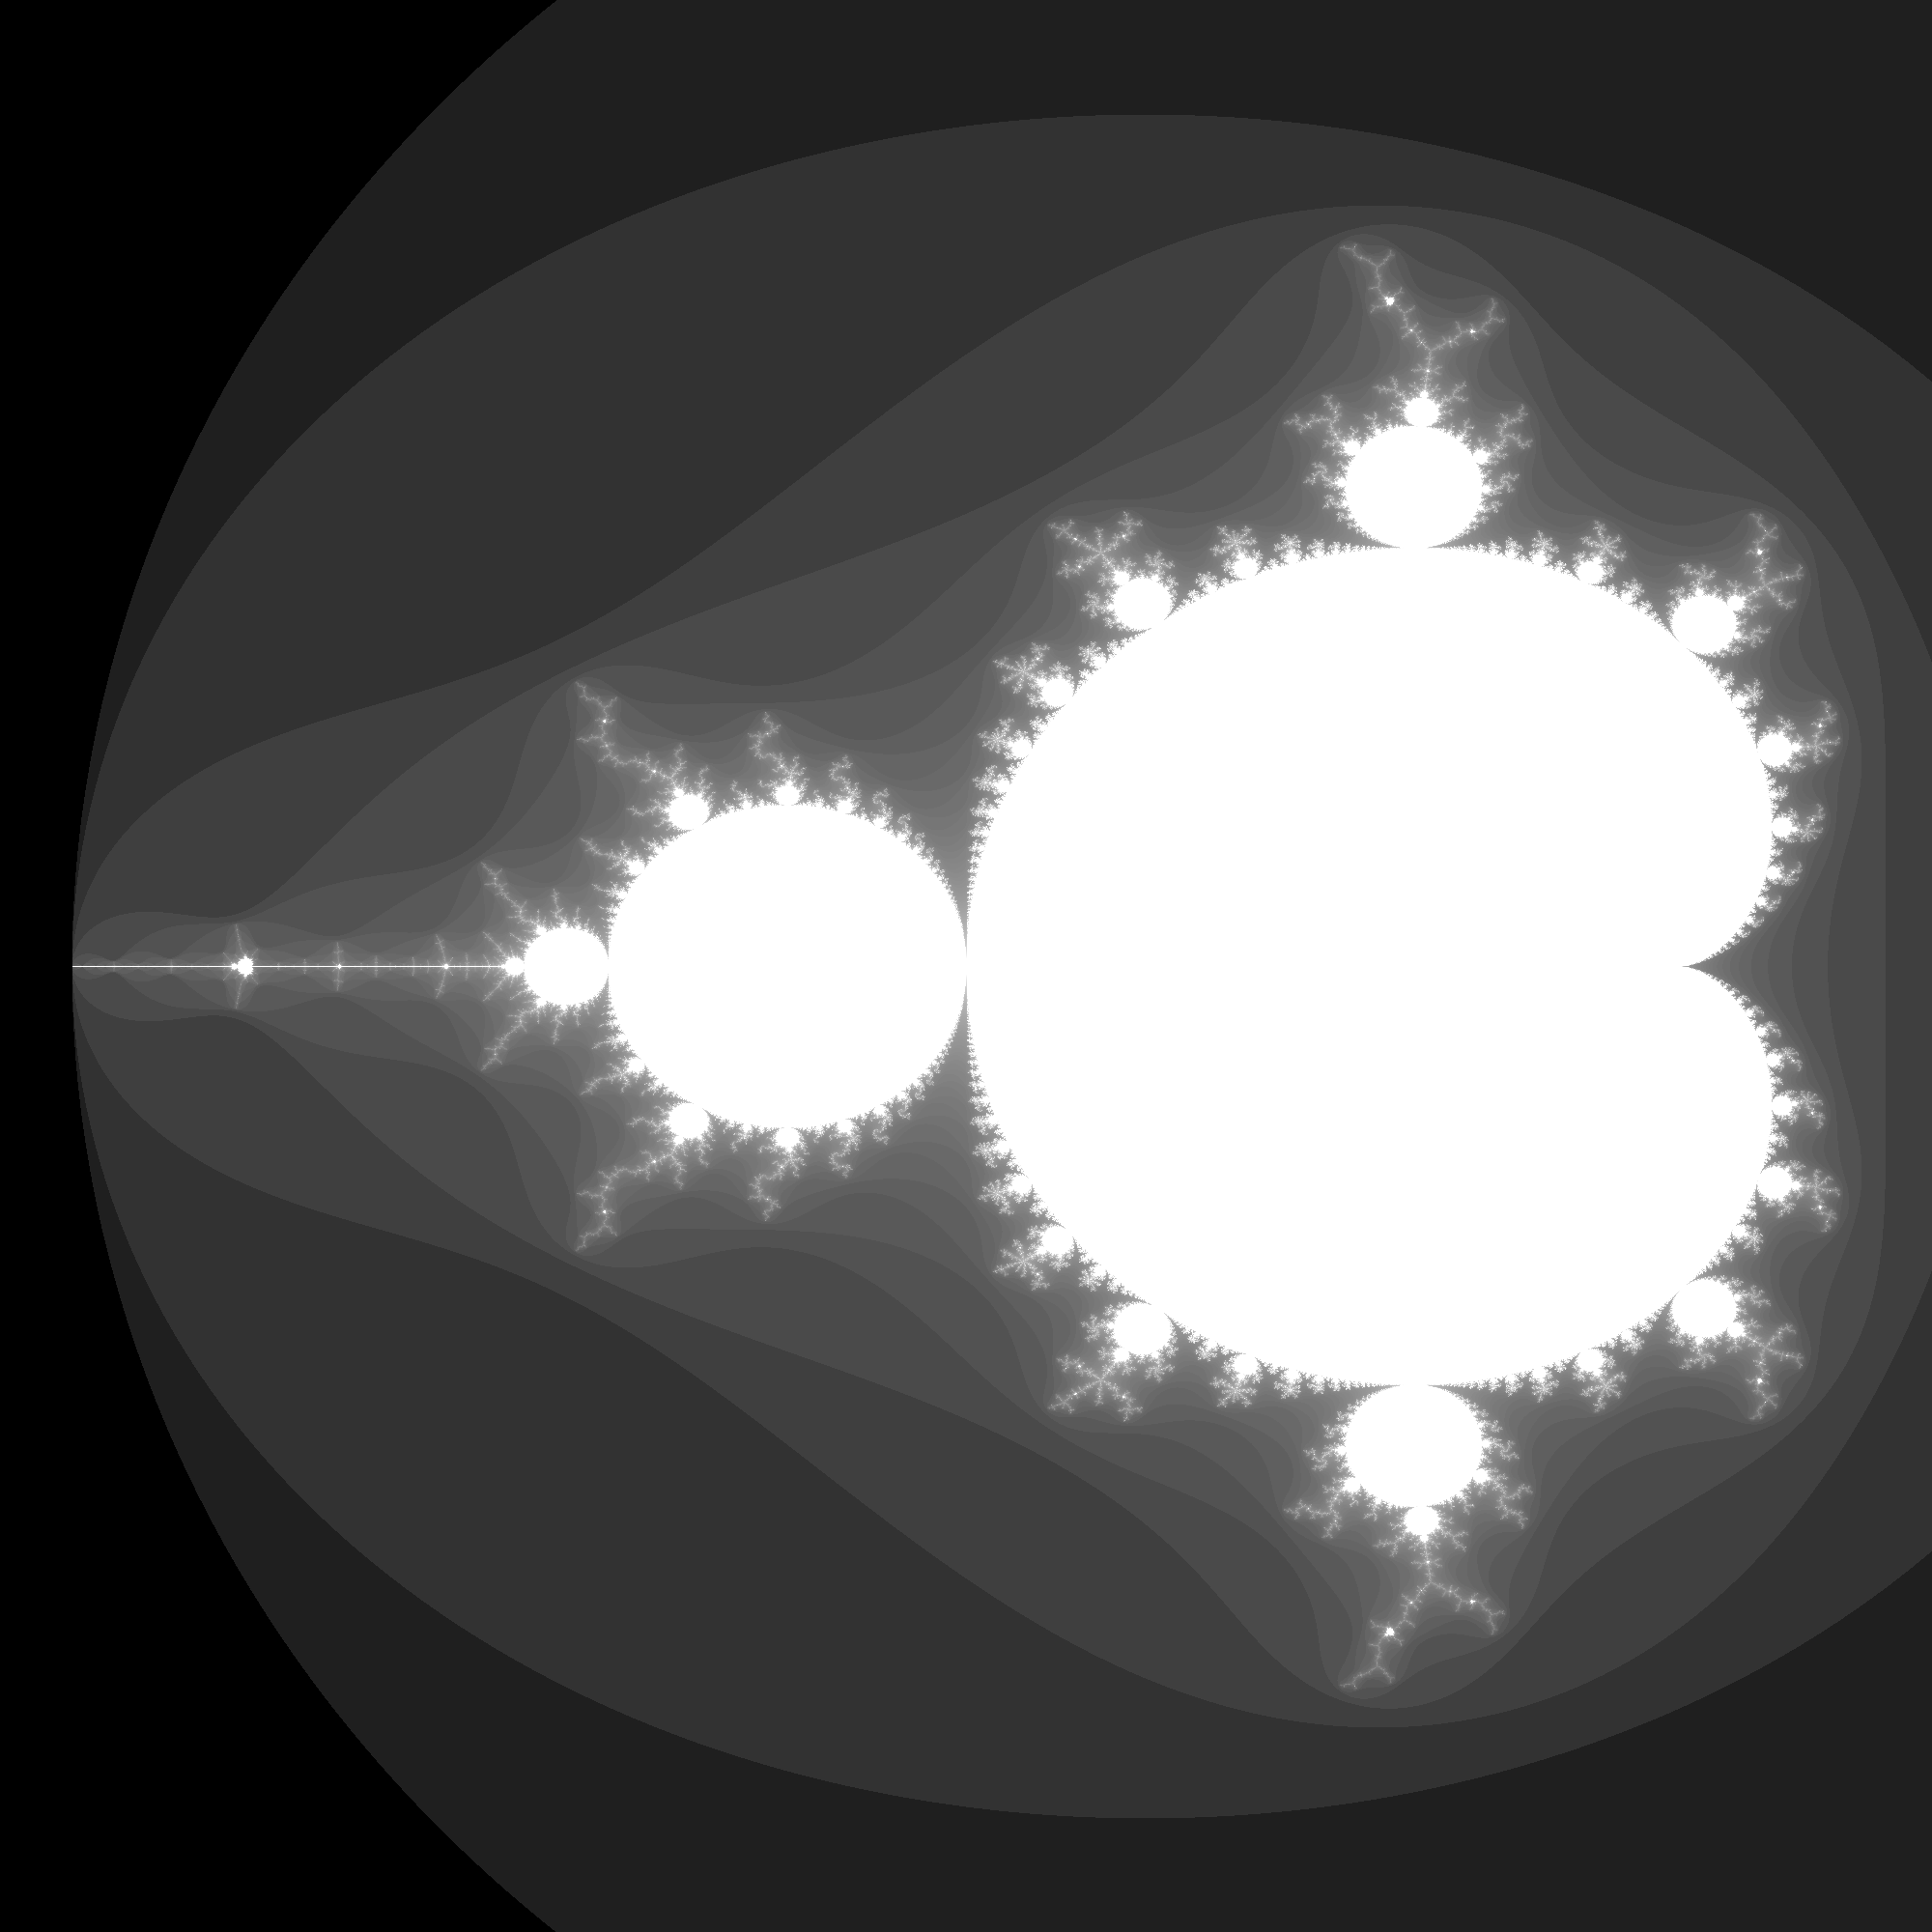

In [6]:
from PIL import Image

# convert values to 0 - 255 int8 format
img=np.log(img)
img = (img/img.max()*255).astype('uint8')
image = Image.fromarray(img)

display(image)

Now repeat using the library with numba

In [8]:
%time numbalib.mandel(img,re1,re2,im1,im2,npX,npY,nTrials) # this will be fast....

CPU times: user 504 ms, sys: 2.02 ms, total: 506 ms
Wall time: 514 ms


Homework project
=================

Project 1
---------
Examine the Python code below.  And create a version using numba jit compilation.  Then produce a plot showing the ratio of the time required to perform the calculation in the two cases (Python/Python+numba) versus the input number *n*.  Extend your plot to at least n=2500.

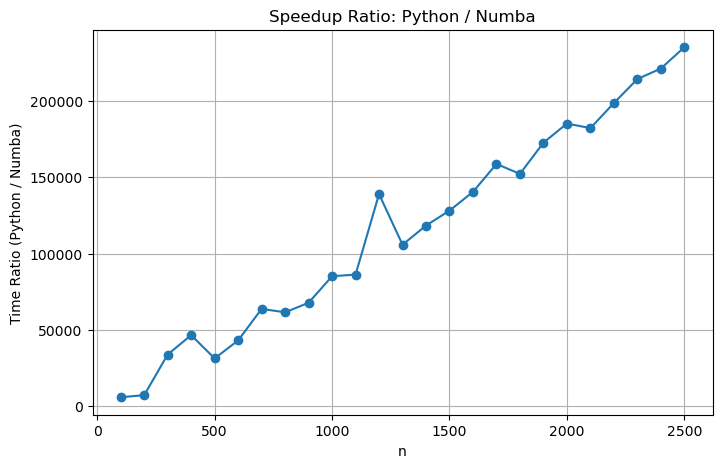

In [26]:
import numpy as np
import timeit
from numba import jit
import matplotlib.pyplot as plt


def count3d(n):
    count = 0
    for i in range(n):
        for j in range(i + 1, n):
            for k in range(j + 1, n):
                count += 1
    return count


@jit(nopython=True)
def count3d_numba(n):
    count = 0
    for i in range(n):
        for j in range(i + 1, n):
            for k in range(j + 1, n):
                count += 1
    return count


n_s = np.arange(100, 2600, 100)
ratios = []
count3d_numba(10)
for n in n_s:
    py_time = timeit.timeit(f'count3d({n})', number=1, globals=globals())
    numba_time = timeit.timeit(f'count3d_numba({n})', number=1, globals=globals())
    ratios.append(py_time / numba_time)

plt.figure(figsize=(8, 5))
plt.plot(n_s, ratios, marker='o')
plt.xlabel("n")
plt.ylabel("Time Ratio (Python / Numba)")
plt.title("Speedup Ratio: Python / Numba")
plt.grid(True)
plt.show()


Below we use the [timeit module](https://docs.python.org/3/library/timeit.html) instead of the cell magick %time.  This allow us to retrieve the time in a Python variable.
Note: computer timers have limited accuracy, therefore you may observe large fractional fluctuations for small times.  The estimate can be improved by averaging over several calls to the code.  Be aware of this, but you don't need to be very accurate in measuring the small times for this project, the case for large *n* is the most interesting region!


In the example below timeit executes the count3d function with n=10.  In this examples the calculation is repeated number=1 times in a trial.  By default 5 trials are run and the best time is reported.  See the timeit documentation for more information.

In [42]:
#%time count3d(ncount)

ncount=10
import timeit
execTime=timeit.timeit(f'count3d({ncount})', number=1, globals=globals())
print(f'execution time = {execTime} seconds')

execution time = 1.3964250683784485e-05 seconds
